# Importing Necessary Libraries

In [27]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load the dataset or gather data

In [4]:
# loading the dataset
df = pd.read_csv("train.csv")
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


# 1️⃣Exploratory Data Analysis (EDA)

In [5]:
#Summary Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [6]:
df.columns  # checking columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [7]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [8]:
df.shape

(59598, 24)

# Excluding Useless Columns

In [9]:
#df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], inplace=True)

In [10]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
59593,False
59594,False
59595,False
59596,False


In [12]:
df.dtypes

,0
Employee ID,int64
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,int64


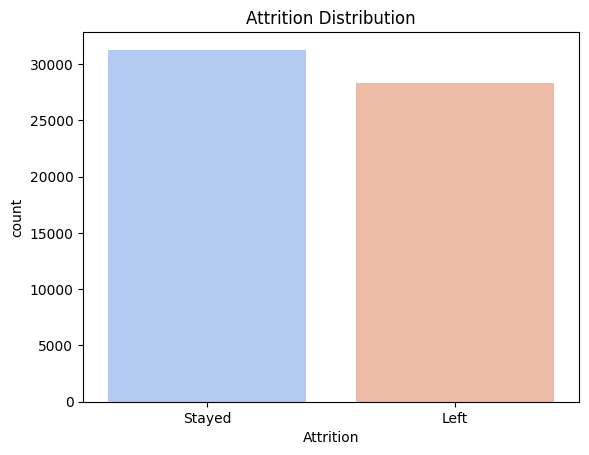

In [13]:
# checking the class imblance of attrition
sns.countplot(x=df['Attrition'], palette="coolwarm")
plt.title('Attrition Distribution')
plt.show()

# Feature Correlation

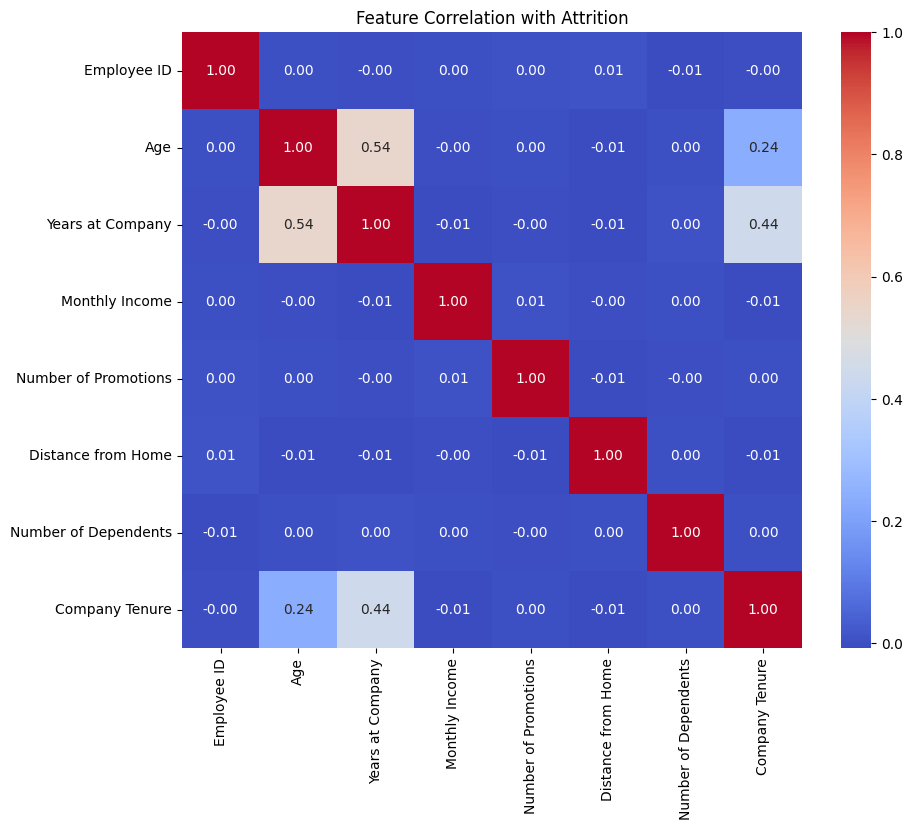

In [14]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Attrition')
plt.show()

In [15]:
df.drop(columns=['Employee ID'],inplace=True)

# Data Preprocessing & Feature Engineering

In [16]:
#Label Encoding

# # encode the cetagorical variables using for loop where object and cetagory data type are given
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

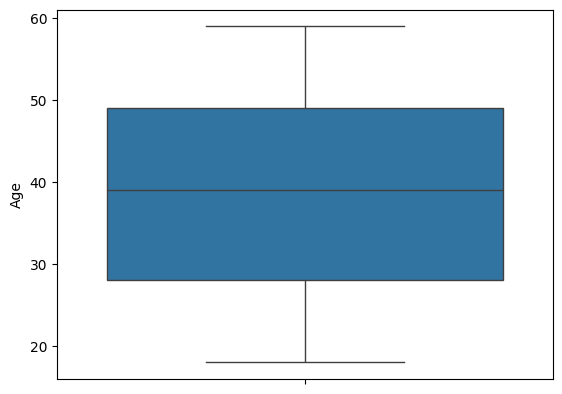

In [17]:
# check the outlier
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Age'])
plt.show()

In [18]:
#Seprate the features x and the target \ labels y

# x  and y columns
x = df.drop(columns=['Attrition'])
y = df['Attrition']

In [19]:
# train test split the data
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
#Scaling the data for better performance
# lets normalize the data for better performance
from sklearn.preprocessing import MinMaxScaler
# create a MinMaxScaler object
scaler = MinMaxScaler()
# fit and transform the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 3️⃣ Model Training

In [21]:
#Call & Train the Model

# call the model
model = LogisticRegression(max_iter= 100, random_state=42)
model.fit(x_train,y_train)
y_pred_1 = model.predict(x_test)


# Now create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

y_pred_2 = rfc.predict(x_test)

# 4️⃣ Model Evaluation

In [25]:
#Evaluate the LogisticRegression Model
print("LogisticRegression Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_1)}')
print(f'Recall: {recall_score(y_test, y_pred_1)}')
print(confusion_matrix(y_test, y_pred_1))
print(f'Precision: {precision_score(y_test, y_pred_1)}')
print(f'F1 Score: {f1_score(y_test, y_pred_1)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred_1)}')

LogisticRegression Model
Accuracy: 0.7078859060402685
Recall: 0.7268511114664961
[[3893 1774]
 [1708 4545]]
Precision: 0.7192593764836208
F1 Score: 0.7230353165765192
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.69      0.69      5667
           1       0.72      0.73      0.72      6253

    accuracy                           0.71     11920
   macro avg       0.71      0.71      0.71     11920
weighted avg       0.71      0.71      0.71     11920



In [26]:
#Evaluate the RandomForestClassifier Model
print("RandomForestClassifier Model")
print(f'Accuracy: {accuracy_score(y_test, y_pred_2)}')
print(f'Recall: {recall_score(y_test, y_pred_2)}')
print(confusion_matrix(y_test, y_pred_2))
print(f'Precision: {precision_score(y_test, y_pred_2)}')
print(f'F1 Score: {f1_score(y_test, y_pred_2)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred_2)}')

RandomForestClassifier Model
Accuracy: 0.734731543624161
Recall: 0.7439628978090517
[[4106 1561]
 [1601 4652]]
Precision: 0.7487526154836633
F1 Score: 0.7463500721963742
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      5667
           1       0.75      0.74      0.75      6253

    accuracy                           0.73     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.73      0.73      0.73     11920



# Hyperparameter Optimization

In [31]:
# Optimized RandomizedSearchCV setup
param_dist = {
    'n_estimators': [100, 150, 200],  # Reduced options
    'max_depth': [None, 15, 25],      # More practical depth
    'min_samples_split': [2, 5],      # Reduced options
    'min_samples_leaf': [1, 2],       # Reduced options
    'max_features': ['sqrt', 'log2'], # Added feature selection
    'class_weight': ['balanced', None],  # Handle class imbalance
    'bootstrap': [True, False]
}

In [32]:
# Optimized RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=15,          # Increased iterations
    cv=3,               # Reduced cross-validation folds
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(x_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced', None],
                                        'max_depth': [None, 15, 25],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [34]:
# Best model evaluation
best_rfc = random_search.best_estimator_
y_pred = best_rfc.predict(x_test)

print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'class_weight': None, 'bootstrap': True}
Accuracy: 0.7435
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5667
           1       0.75      0.76      0.76      6253

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920

